In [1]:
# Importing Basic Python Libraries

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Dataset Using Pandas Functionality

try:
    data = pd.read_csv('E:\MachineLearning\Dataset\cement_compressive_strength.csv')
except:
    print('Check Data Connections.')

In [3]:
# Plot Style Implementation

print('Checking Different Plot Styles.....')
print(plt.style.available)
print('*'*20)
plt.style.use('fivethirtyeight')
print(f'Plot Style "{plt.style.available[8]}" Implemented Successfully...')

Checking Different Plot Styles.....
['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
********************
Plot Style "fivethirtyeight" Implemented Successfully...


In [4]:
pd.set_option('display.max_columns',None)

In [5]:
def stats(data):
    print('Dataset Shape Statistics')
    print('*'*20)
    print(data.shape)
    print('Dataset Information')
    print('*'*20)
    print(data.info())
    print('Checking Null Values in the Dataset')
    print('*'*20)
    print(data.isnull().sum())
       
stats(data)

Dataset Shape Statistics
********************
(1030, 9)
Dataset Information
********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None
Checking Null Values in the Dataset
********************
cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age          

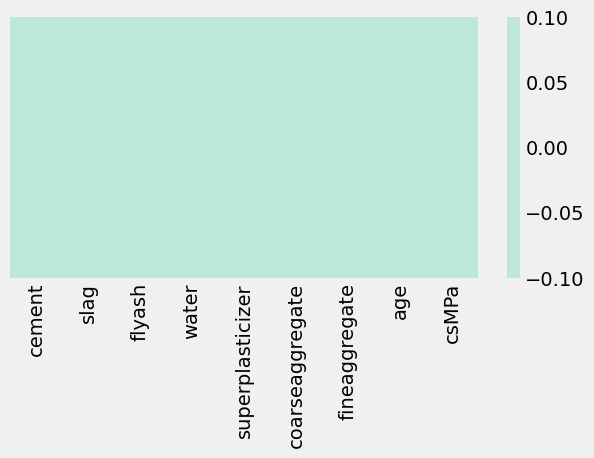

In [6]:
sns.heatmap(data.isnull(),yticklabels=False,center = True,fmt = '.2g')
plt.tight_layout()
plt.show()

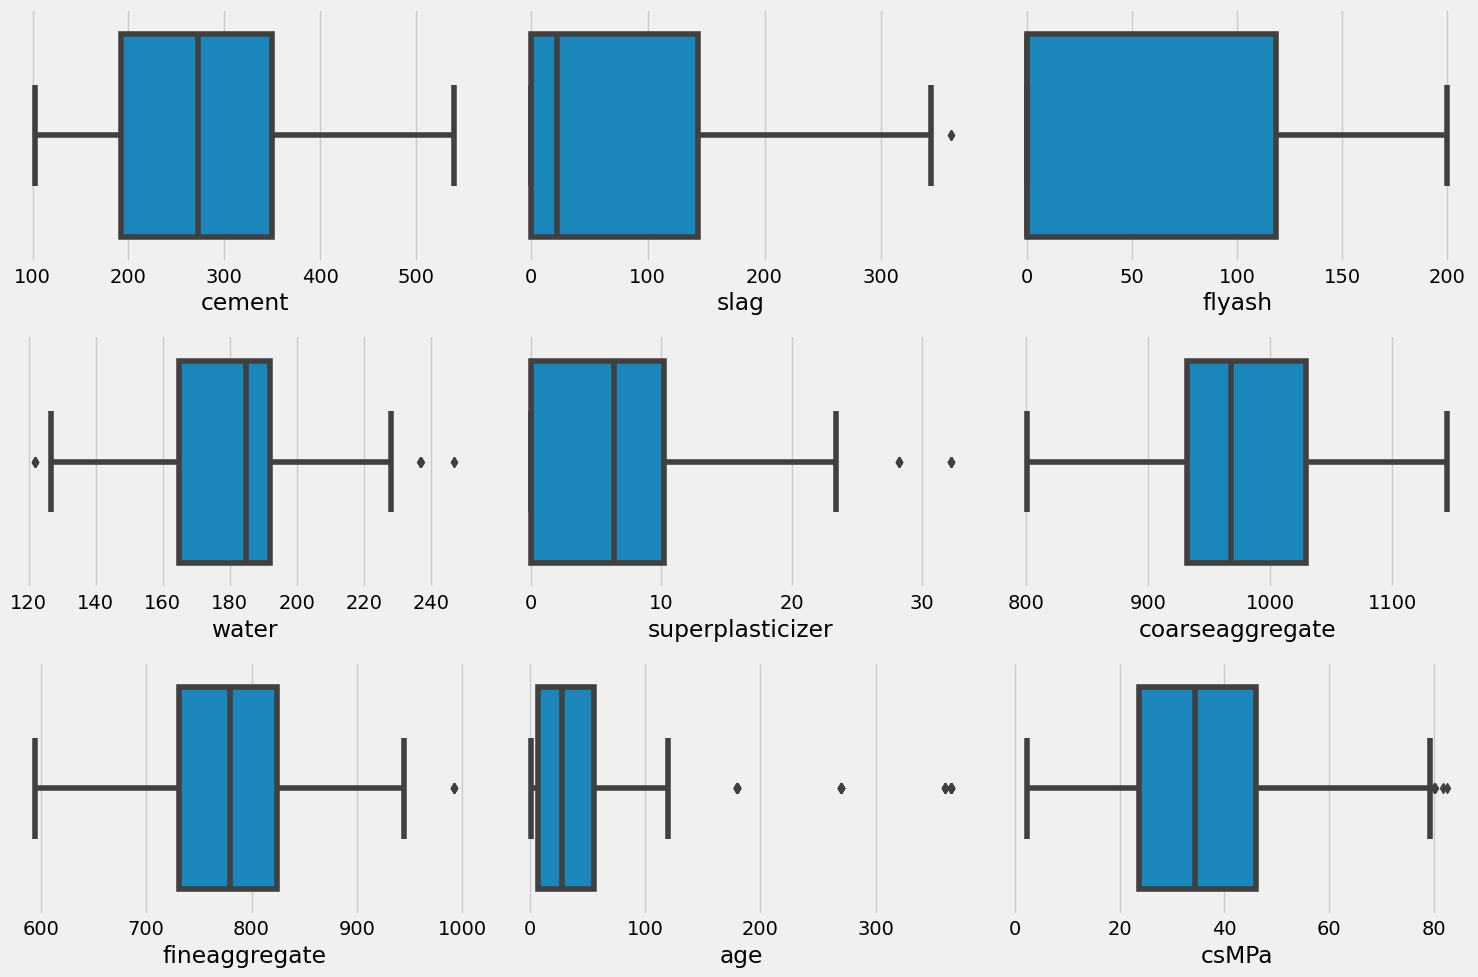

In [7]:
cols = data.columns
plt.figure(figsize = (15,10))

plot = 1

for i in range(0,len(cols)):
    if plot<=9:
        ax = plt.subplot(3,3,plot)
        sns.boxplot(ax =ax ,data = data,x = cols[i])
    plot += 1   

plt.tight_layout()
plt.show()

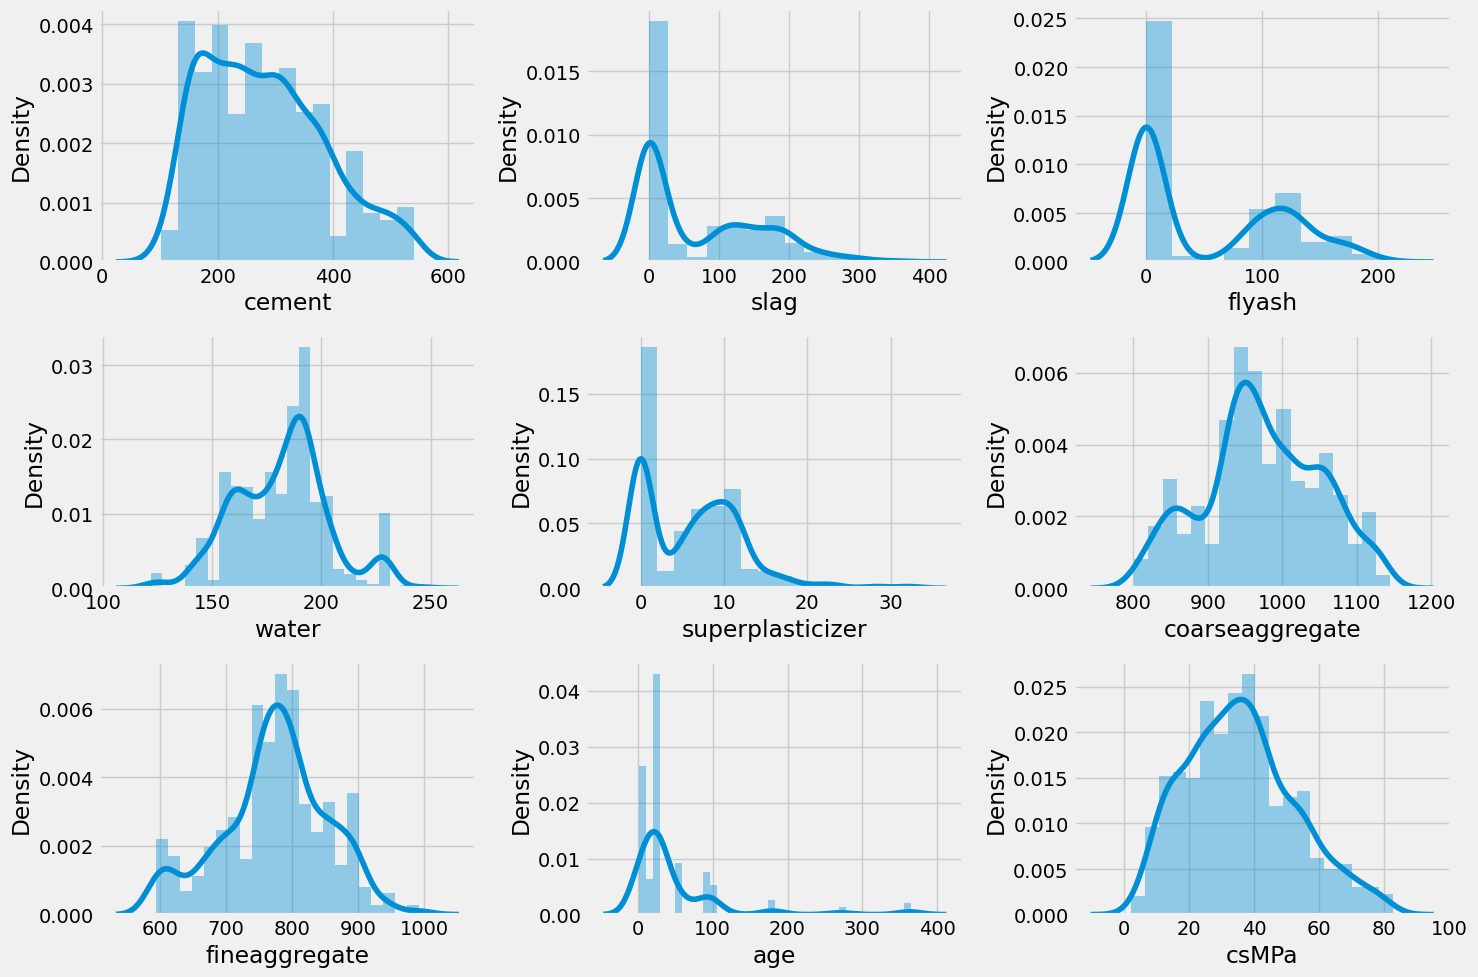

In [8]:
cols = data.columns
plt.figure(figsize = (15,10))

plot = 1

for i in cols:
    if plot<=9:
        ax = plt.subplot(3,3,plot)
        sns.distplot(data[i])
    plot += 1   

plt.tight_layout()
plt.show()

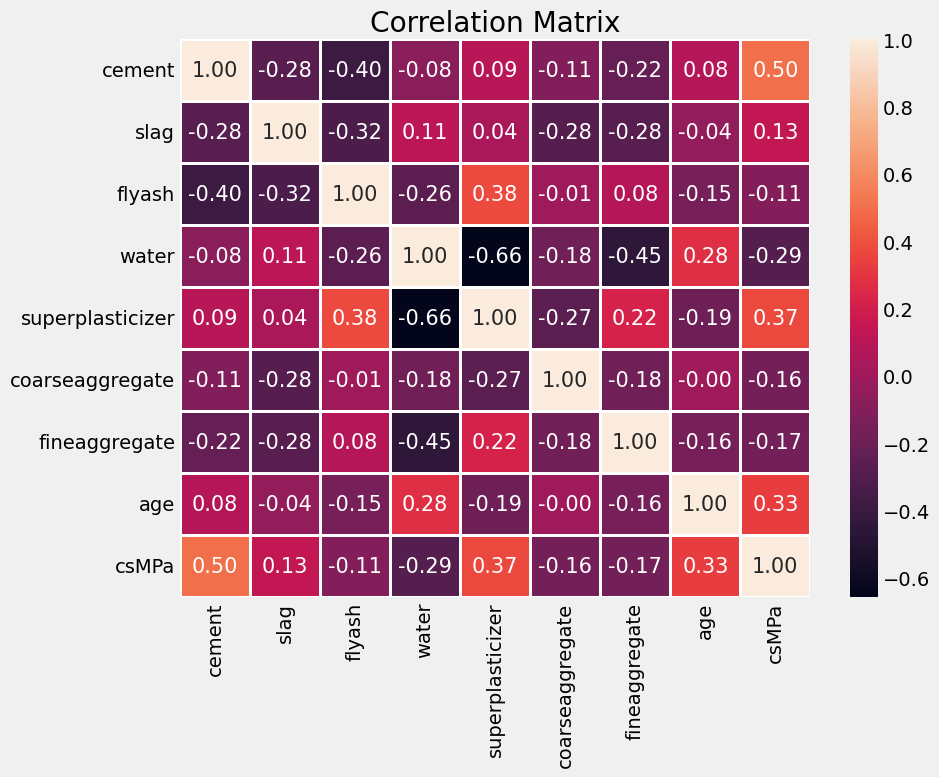

In [9]:
def corr(data):
    plt.figure(figsize=(10,8))
    sns.heatmap(data.corr(),annot=True,fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'white')
    plt.title('Correlation Matrix')
    plt.tight_layout()
    
    plt.show()

corr(data)

<Figure size 1500x1000 with 0 Axes>

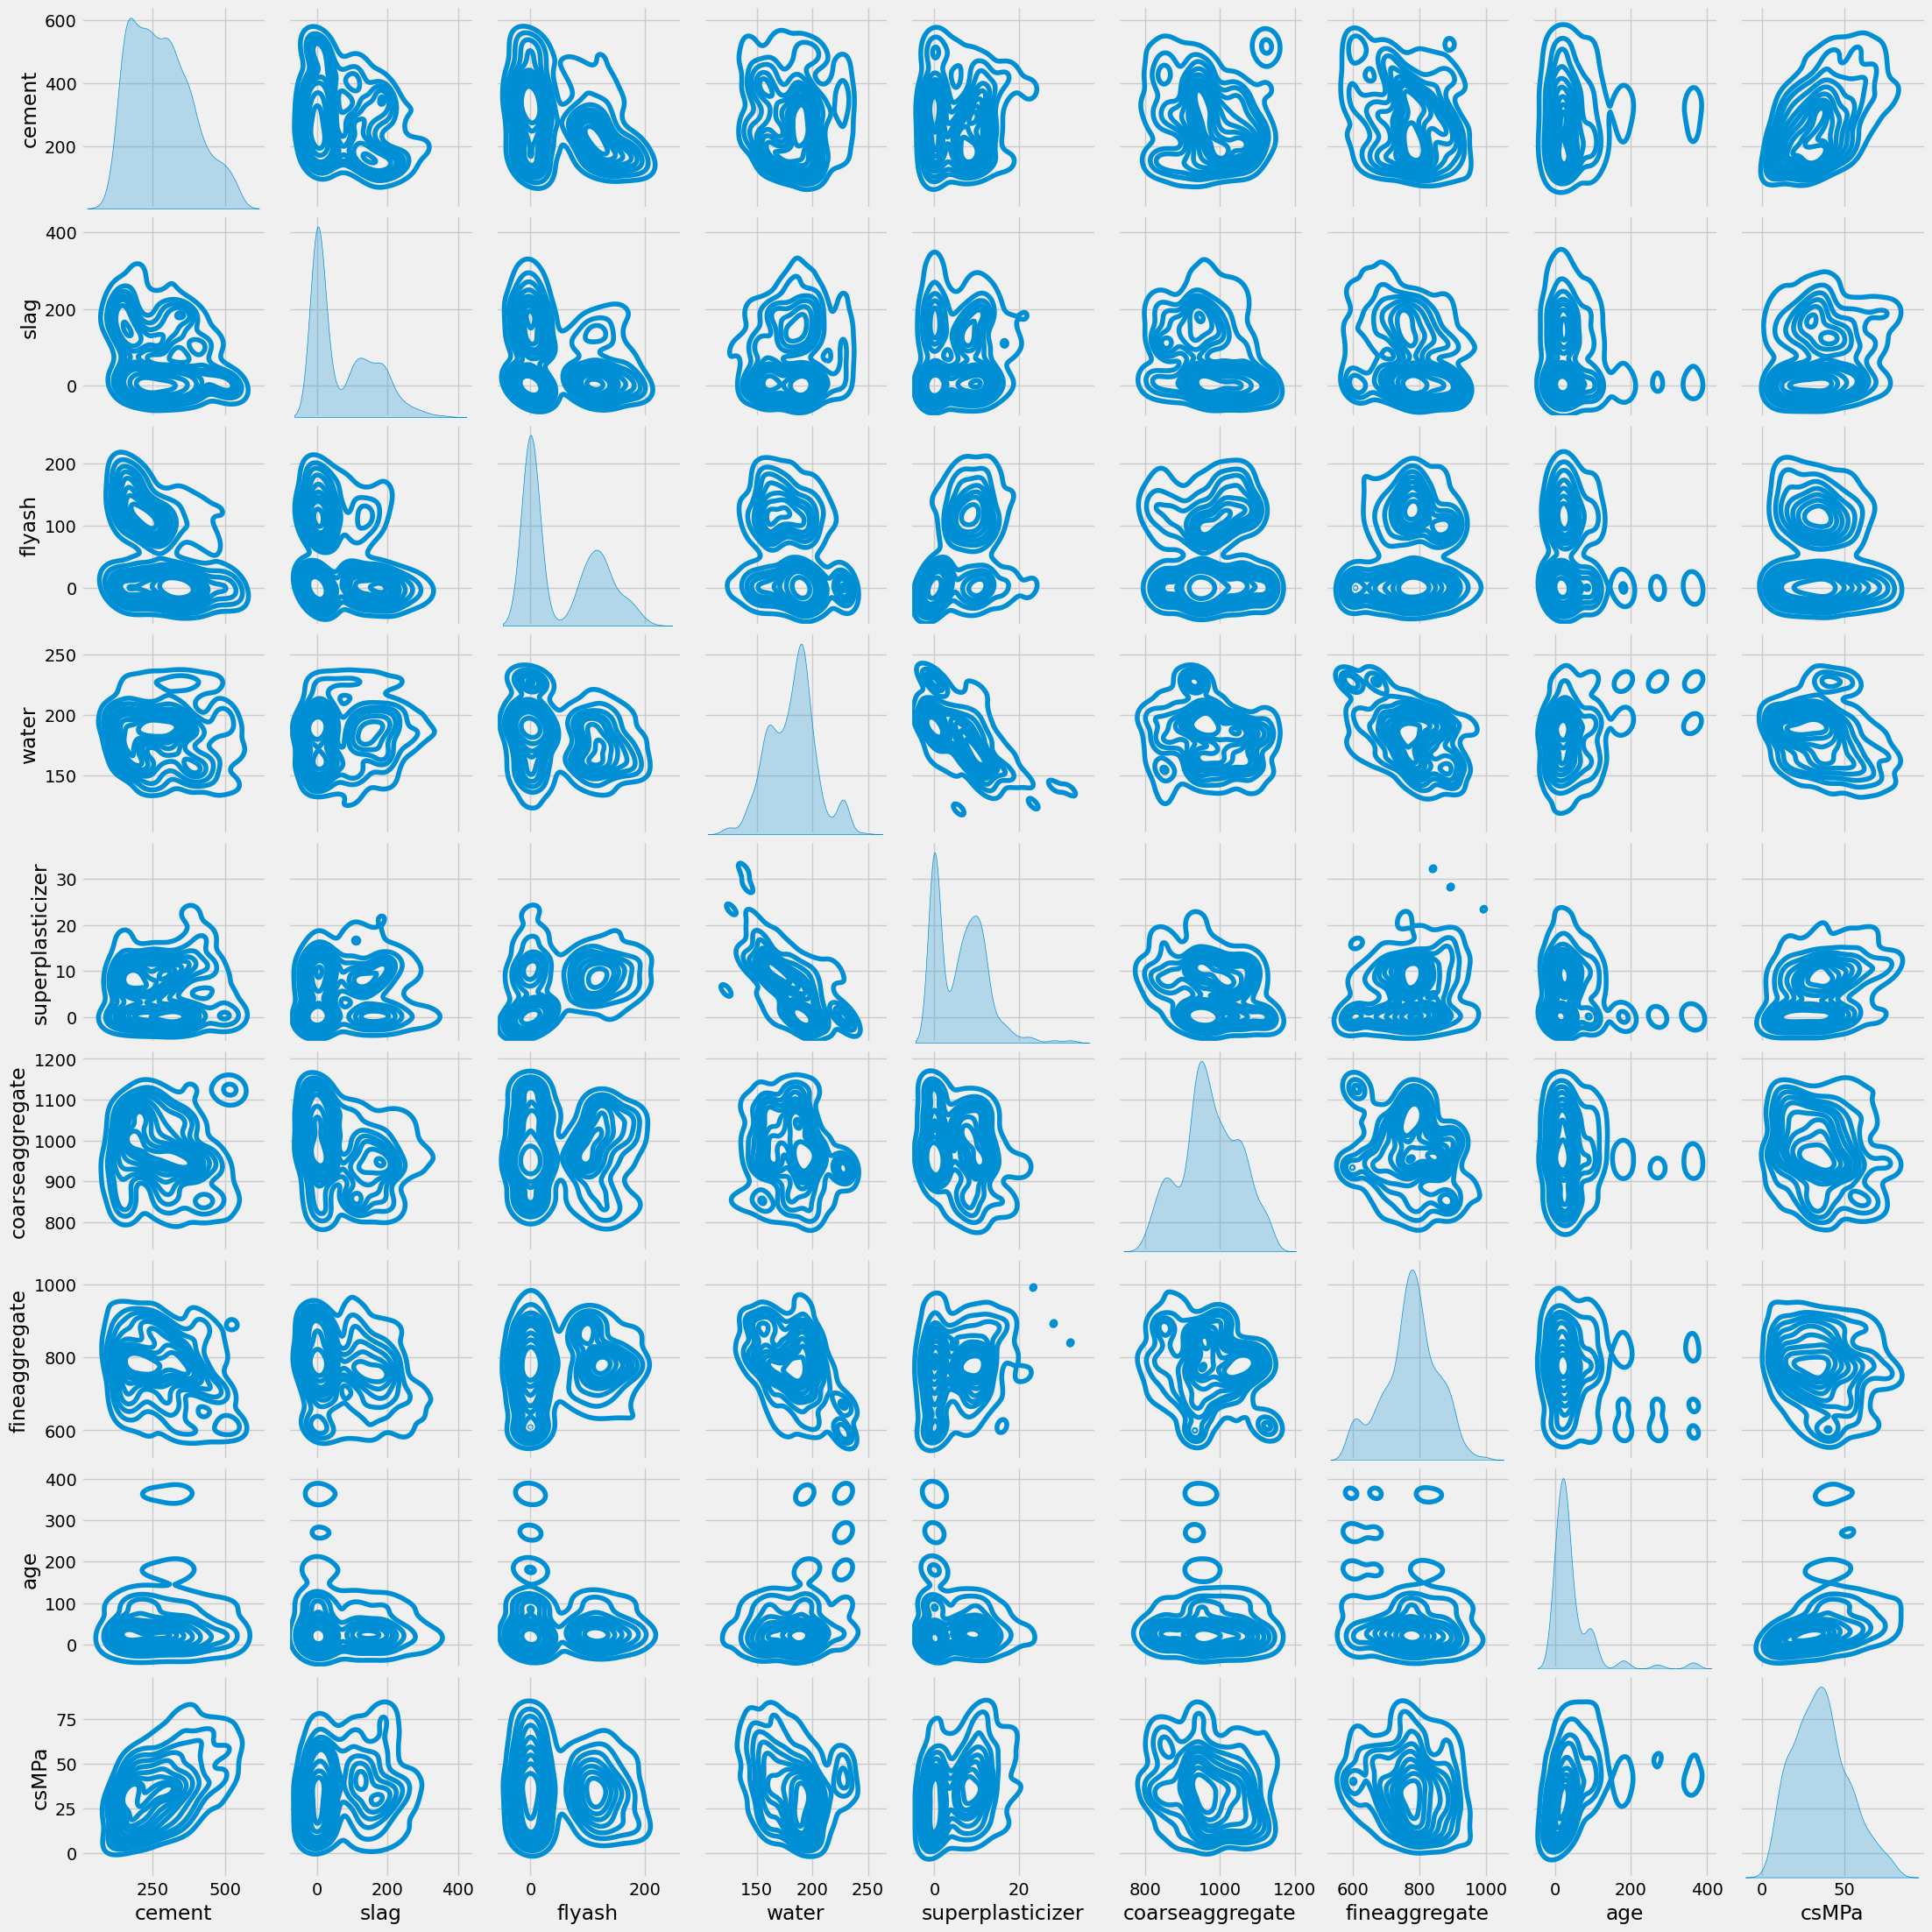

In [10]:
plt.figure(figsize = (15,10))
sns.pairplot(data,kind = 'kde')
plt.show()

In [11]:
# Hyper parameterization with Randomized search cv
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [27]:
def model_evaluation(data):
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error, r2_score
    from sklearn.linear_model import LinearRegression, Ridge, Lasso
    
    # Split the data into Independent and Target columns
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    
    # Apply log transformation
    X = X + 1  # To avoid log(0), ensure no zero values
    X = np.log(X)
    
    # Split the dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)
    
    # Model Evaluation
    models = [LinearRegression(), Ridge(), Lasso()] 
    for model in models:
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        
        # Model Output
        print(model)
        print('MSE:', mean_squared_error(y_test, pred))
        print('R2 Score:', r2_score(y_test, pred))
        print('*' * 20)  
        
   

# Assuming `data` is a pandas DataFrame, you can call the function like this:
model_evaluation(data)


LinearRegression()
MSE: 53.14414229364404
R2 Score: 0.7867742206977923
********************
Ridge()
MSE: 52.98631015822992
R2 Score: 0.7874074773206324
********************
Lasso()
MSE: 66.01419385951786
R2 Score: 0.7351367935730866
********************
